##CS 2302 - Lab 4 - Graphs





## **Before you start**

Make a copy of this Colab by clicking on File > Save a Copy in Drive


In [12]:
#@title  { run: "auto", display-mode: "form" }
first_name = "Eric " #@param {type:"string"}
last_name = "Quezada" #@param {type:"string"}
email_address = "erquezada@miners.utep.edu" #@param {type:"string"}

## Problem 1

### [50 points] Prim's Algorithm

Implement Prim's algorithm. Your implementation should work for both GraphAL (i.e., Graph-Adjacency List) and GraphAM (i.e., Graph-Adjacency Matrix) instances. Feel free to copy the classes from your previous quizzes/assignments and add more methods if necessary. Also, feel free to use and adapt the instructor's implementation of a heap. A heap can be used to find the lowest cost edge (u,v) where u is in *connected* and v is not in *connected*.


    def prims(graph, u):  # u = arbitrary, initial vertex

        minimum_spanning_tree = set()

        connected = set()
        connected.add(u)
        
        while len(connected) != graph.num_vertices() - 1:
          edge = lowest cost edge (u,v) where u is in connected and v is not in connected
          minimum_spanning_tree.add(edge)
          connected.add(v)

        return minimum_spanning_tree

### Min Heap Implementation

In [13]:
import numpy as np
import matplotlib.pyplot as plt

class MinHeap(object):
  def __init__(self):
    self.tree = []

  def is_empty(self):
    return len(self.tree) == 0

  def insert(self, item):
    self.tree.append(item)
    self._percolate_up(len(self.tree) - 1)

  def _percolate_up(self, i):
    while i > 0 and self.tree[i] < self.tree[(i-1)//2]:
      self.tree[i], self.tree[(i-1)//2] = self.tree[(i-1)//2], self.tree[i]
      i = (i-1)//2

  def extract(self):
    if len(self.tree) == 0:
      raise Exception("Cannot extract from an empty tree")

    if len(self.tree) == 1:
      return self.tree.pop()

    org_root = self.tree[0]
    self.tree[0] = self.tree.pop()

    self._percolate_down(0)

    return org_root

  def _percolate_down(self, i):
    # While i has at least one child
    while 2*i + 1 < len(self.tree):
      left_child_val = self.tree[2*i + 1]
      right_child_val = float("inf")

      # Check if i has a right child
      if 2*i + 2 < len(self.tree):
        right_child_val = self.tree[2*i + 2]

      if self.tree[i] <= min(left_child_val, right_child_val):
        break

      min_child_i = 2*i + 1 if left_child_val < right_child_val else 2*i + 2

      self.tree[i],self.tree[min_child_i] = self.tree[min_child_i],self.tree[i]
      i = min_child_i

  def draw(self):
    if not self.is_empty():
      fig, ax = plt.subplots()
      self.draw_(0, 0, 0, 100, 50, ax)
      ax.axis('off')
      ax.set_aspect(1.0)

  def draw_(self, i, x, y, dx, dy, ax):
    if 2*i + 1 < len(self.tree):
      p=np.array([[x,y], [x-dx,y-dy]])
      ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
      self.draw_(2*i + 1, x-dx, y-dy, dx/2, dy, ax)
    if 2*i + 2 < len(self.tree):
      p=np.array([[x,y], [x+dx,y-dy]])
      ax.plot(p[:,0],p[:,1],linewidth=1,color='k')
      self.draw_(2*i + 2, x+dx, y-dy, dx/2, dy, ax)
    ax.text(x,y, str(self.tree[i]), size=20,ha="center", va="center",
          bbox=dict(facecolor='w',boxstyle="circle"))


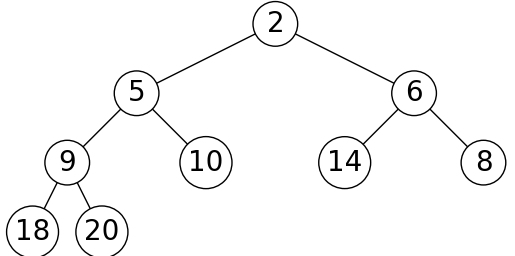

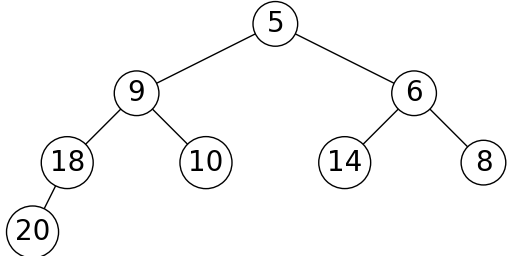

In [14]:
# This is a sample of min heap usage.
# It is not necessarily useful for Prims Algorithm
# But it is an example of how it can be used
heap = MinHeap()
heap.insert(10)
heap.insert(8)
heap.insert(6)
heap.insert(18)
heap.insert(9)
heap.insert(14)
heap.insert(2)
heap.insert(5)
heap.insert(20)

heap.draw()
heap.extract()
heap.draw()

### Adjacency List Representation

[[(1,1)(2,1)] [(0,1)(2,1)(4,1)] [(0,1)(1,1)(3,1)] [(2,1)(4,1)] [(3,1)(1,1)] [] ]


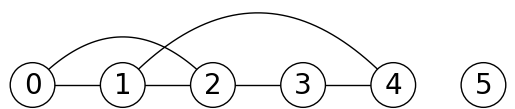

[[(1,1)(2,1)] [(0,1)(4,1)] [(0,1)(3,1)] [(2,1)(4,1)] [(3,1)(1,1)] [] ]


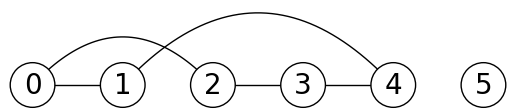

[[(1,1)(2,1)] [(2,1)] [(3,1)] [(4,1)] [(1,1)] [] ]


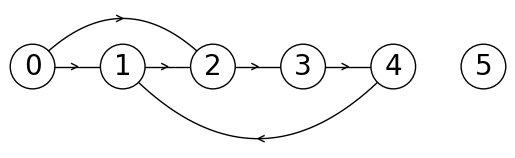

[[(1,1)(2,1)] [] [(3,1)] [(4,1)] [(1,1)] [] ]


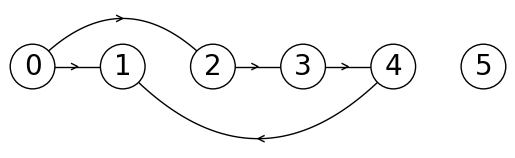

[[(1,4)(2,3)] [(0,4)(2,2)(4,4)] [(0,3)(1,2)(3,1)] [(2,1)(4,5)] [(3,5)(1,4)] [] ]


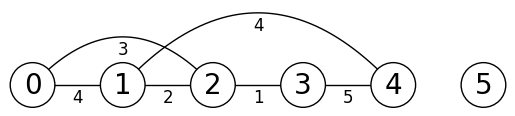

[[(1,4)(2,3)] [(0,4)(4,4)] [(0,3)(3,1)] [(2,1)(4,5)] [(3,5)(1,4)] [] ]


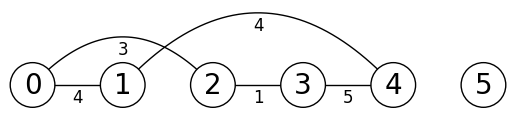

[[(1,4)(2,3)] [(2,2)] [(3,1)] [(4,5)] [(1,4)] [] ]


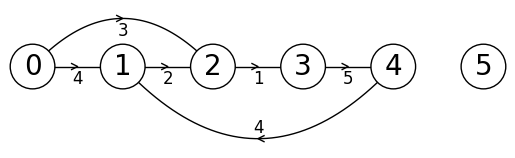

[[(1,4)(2,3)] [] [(3,1)] [(4,5)] [(1,4)] [] ]


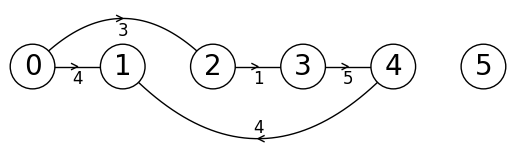

In [15]:
from scipy.interpolate import interp1d


class Edge:
    def __init__(self, dest, weight=1):
        self.dest = dest
        self.weight = weight


class GraphAL:
    # Constructor
    def __init__(self, vertices, weighted=False, directed=False):
        self.al = [[] for i in range(vertices)]
        self.weighted = weighted
        self.directed = directed
        self.representation = 'AL'


    def is_valid_vertex(self, u):
        return 0 <= u < len(self.al)


    def insert_vertex(self):
        self.al.append([])

        return len(self.al) - 1  # Return id of new vertex

    #
    # 0: []
    # 1: []
    # 2: []
    # 3: []
    #
    def insert_edge(self, source, dest, weight=1):
        if not self.is_valid_vertex(source) or not self.is_valid_vertex(dest):
            print('Error, vertex number out of range')
        elif weight != 1 and not self.weighted:
            print('Error, inserting weighted edge to unweighted graph')
        else:
            self.al[source].append(Edge(dest, weight))
            if not self.directed:
                self.al[dest].append(Edge(source, weight))

    def delete_edge(self, source, dest):
        if source >= len(self.al) or dest >= len(self.al) or source < 0 or dest < 0:
            print('Error, vertex number out of range')
        else:
            deleted = self._delete_edge(source, dest)
            if not self.directed:
                deleted = self._delete_edge(dest, source)
            if not deleted:
                print('Error, edge to delete not found')

    def _delete_edge(self, source, dest):
        i = 0
        for edge in self.al[source]:
            if edge.dest == dest:
                self.al[source].pop(i)
                return True
            i += 1
        return False

    def num_vertices(self):
        return len(self.al)


    def display(self):
        print('[', end='')
        for i in range(len(self.al)):
            print('[', end='')
            for edge in self.al[i]:
                print('(' + str(edge.dest) + ',' + str(edge.weight) + ')', end='')
            print(']', end=' ')
        print(']')

    def draw(self):
        scale = 30
        fig, ax = plt.subplots()
        for i in range(len(self.al)):
            for edge in self.al[i]:
                d, w = edge.dest, edge.weight
                if self.directed or d > i:
                    x = np.linspace(i * scale, d * scale)
                    x0 = np.linspace(i * scale, d * scale, num=5)
                    diff = np.abs(d - i)
                    if diff == 1:
                        y0 = [0, 0, 0, 0, 0]
                    else:
                        y0 = [0, -6 * diff, -8 * diff, -6 * diff, 0]
                    f = interp1d(x0, y0, kind='cubic')
                    y = f(x)
                    s = np.sign(i - d)
                    ax.plot(x, s * y, linewidth=1, color='k')
                    if self.directed:
                        xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
                        yd = [y0[2] - 1, y0[2], y0[2] + 1]
                        yd = [y * s for y in yd]
                        ax.plot(xd, yd, linewidth=1, color='k')
                    if self.weighted:
                        xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
                        yd = [y0[2] - 1, y0[2], y0[2] + 1]
                        yd = [y * s for y in yd]
                        ax.text(xd[2] - s * 2, yd[2] + 3 * s, str(w), size=12, ha="center", va="center")
            ax.plot([i * scale, i * scale], [0, 0], linewidth=1, color='k')
            ax.text(i * scale, 0, str(i), size=20, ha="center", va="center",
                    bbox=dict(facecolor='w', boxstyle="circle"))
        ax.axis('off')
        ax.set_aspect(1.0)
        plt.show()


import matplotlib.pyplot as plt
import numpy as np


if __name__ == "__main__":
    plt.close("all")
    g = GraphAL(6)
    g.insert_edge(0, 1)
    g.insert_edge(0, 2)
    g.insert_edge(1, 2)
    g.insert_edge(2, 3)
    g.insert_edge(3, 4)
    g.insert_edge(4, 1)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAL(6, directed=True)
    g.insert_edge(0, 1)
    g.insert_edge(0, 2)
    g.insert_edge(1, 2)
    g.insert_edge(2, 3)
    g.insert_edge(3, 4)
    g.insert_edge(4, 1)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAL(6, weighted=True)
    g.insert_edge(0, 1, 4)
    g.insert_edge(0, 2, 3)
    g.insert_edge(1, 2, 2)
    g.insert_edge(2, 3, 1)
    g.insert_edge(3, 4, 5)
    g.insert_edge(4, 1, 4)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAL(6, weighted=True, directed=True)
    g.insert_edge(0, 1, 4)
    g.insert_edge(0, 2, 3)
    g.insert_edge(1, 2, 2)
    g.insert_edge(2, 3, 1)
    g.insert_edge(3, 4, 5)
    g.insert_edge(4, 1, 4)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()



### Adjacency Matrix Representation

[[(1,1)(2,1)] [(0,1)(2,1)(4,1)] [(0,1)(1,1)(3,1)] [(2,1)(4,1)] [(1,1)(3,1)] [] ]


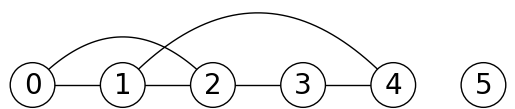

[[(1,1)(2,1)] [(0,1)(4,1)] [(0,1)(3,1)] [(2,1)(4,1)] [(1,1)(3,1)] [] ]


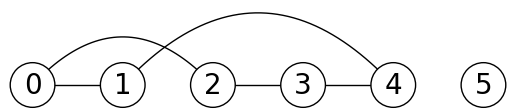

[[(1,1)(2,1)] [(2,1)] [(3,1)] [(4,1)] [(1,1)] [] ]


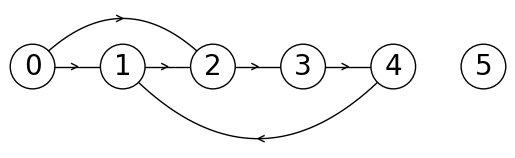

[[(1,1)(2,1)] [] [(3,1)] [(4,1)] [(1,1)] [] ]


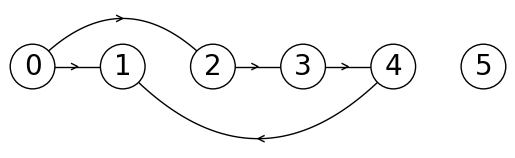

[[(1,4)(2,3)] [(0,4)(2,2)(4,4)] [(0,3)(1,2)(3,1)] [(2,1)(4,5)] [(1,4)(3,5)] [] ]


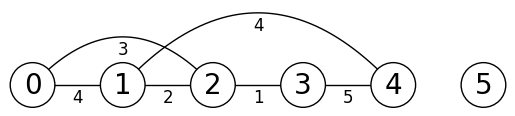

[[(1,4)(2,3)] [(0,4)(4,4)] [(0,3)(3,1)] [(2,1)(4,5)] [(1,4)(3,5)] [] ]


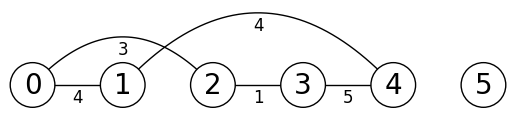

[[(1,4)(2,3)] [(2,2)] [(3,1)] [(4,5)] [(1,4)] [] ]


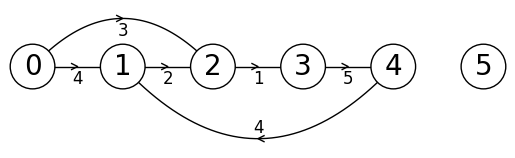

[[(1,4)(2,3)] [] [(3,1)] [(4,5)] [(1,4)] [] ]


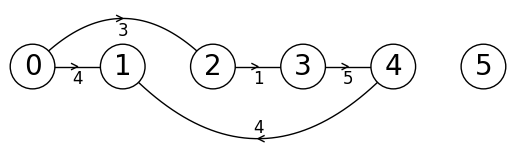

In [16]:
from scipy.interpolate import interp1d


class GraphAM:

    def __init__(self, vertices, weighted=False, directed=False):
        self.am = []

        for i in range(vertices):  # Assumption / Design Decision: None represents non-existing edge
            self.am.append([None] * vertices)

        self.directed = directed
        self.weighted = weighted
        self.representation = 'AM'

    def is_valid_vertex(self, u):
        return 0 <= u < len(self.am)

    def insert_vertex(self):
        for lst in self.am:
            lst.append(None)

        new_row = [None] * (len(self.am) + 1)  # Assumption / Design Decision: None represents non-existing edge
        self.am.append(new_row)

        return len(self.am) - 1  # Return new vertex id

    def insert_edge(self, src, dest, weight=1):
        if not self.is_valid_vertex(src) or not self.is_valid_vertex(dest):
          print("Error insert_edge")
          return

        self.am[src][dest] = weight

        if not self.directed:
            self.am[dest][src] = weight

    def delete_edge(self, src, dest):
        self.insert_edge(src, dest, None)

    def num_vertices(self):
        return len(self.am)


    def display(self):
        print('[', end='')
        for i in range(len(self.am)):
            print('[', end='')
            for j in range(len(self.am[i])):
                edge = self.am[i][j]
                if edge != None:
                    print('(' + str(j) + ',' + str(edge) + ')', end='')
            print(']', end=' ')
        print(']')

    def draw(self):
        scale = 30
        fig, ax = plt.subplots()
        for i in range(len(self.am)):
            for j in range(len(self.am[i])):
                edge = self.am[i][j]

                if edge != None:
                    d, w = j, edge
                    if self.directed or d > i:
                        x = np.linspace(i * scale, d * scale)
                        x0 = np.linspace(i * scale, d * scale, num=5)
                        diff = np.abs(d - i)
                        if diff == 1:
                            y0 = [0, 0, 0, 0, 0]
                        else:
                            y0 = [0, -6 * diff, -8 * diff, -6 * diff, 0]
                        f = interp1d(x0, y0, kind='cubic')
                        y = f(x)
                        s = np.sign(i - d)
                        ax.plot(x, s * y, linewidth=1, color='k')
                        if self.directed:
                            xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
                            yd = [y0[2] - 1, y0[2], y0[2] + 1]
                            yd = [y * s for y in yd]
                            ax.plot(xd, yd, linewidth=1, color='k')
                        if self.weighted:
                            xd = [x0[2] + 2 * s, x0[2], x0[2] + 2 * s]
                            yd = [y0[2] - 1, y0[2], y0[2] + 1]
                            yd = [y * s for y in yd]
                            ax.text(xd[2] - s * 2, yd[2] + 3 * s, str(w), size=12, ha="center", va="center")
            ax.plot([i * scale, i * scale], [0, 0], linewidth=1, color='k')
            ax.text(i * scale, 0, str(i), size=20, ha="center", va="center",
                    bbox=dict(facecolor='w', boxstyle="circle"))
        ax.axis('off')
        ax.set_aspect(1.0)
        plt.show()


import matplotlib.pyplot as plt
import numpy as np

if __name__ == "__main__":
    plt.close("all")
    g = GraphAM(6)
    g.insert_edge(0, 1)
    g.insert_edge(0, 2)
    g.insert_edge(1, 2)
    g.insert_edge(2, 3)
    g.insert_edge(3, 4)
    g.insert_edge(4, 1)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAM(6, directed=True)
    g.insert_edge(0, 1)
    g.insert_edge(0, 2)
    g.insert_edge(1, 2)
    g.insert_edge(2, 3)
    g.insert_edge(3, 4)
    g.insert_edge(4, 1)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAM(6, weighted=True)
    g.insert_edge(0, 1, 4)
    g.insert_edge(0, 2, 3)
    g.insert_edge(1, 2, 2)
    g.insert_edge(2, 3, 1)
    g.insert_edge(3, 4, 5)
    g.insert_edge(4, 1, 4)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()

    g = GraphAM(6, weighted=True, directed=True)
    g.insert_edge(0, 1, 4)
    g.insert_edge(0, 2, 3)
    g.insert_edge(1, 2, 2)
    g.insert_edge(2, 3, 1)
    g.insert_edge(3, 4, 5)
    g.insert_edge(4, 1, 4)
    g.display()
    g.draw()
    g.delete_edge(1, 2)
    g.display()
    g.draw()


### Problem 1 Implementation

In [17]:
# Prims Graph with Adjacency List
def prims_graphal(graph, start=0):
    if graph.num_vertices() == 0:
        return set(), 0

    mst = set()
    total_cost = 0
    connected = set()
    connected.add(start)

    min_heap = MinHeap()

    # Insert all edges from the starting vertex into the heap
    for edge in graph.al[start]:
        min_heap.insert((edge.weight, start, edge.dest))

    while len(connected) < graph.num_vertices():
        if min_heap.is_empty():
            raise Exception("Graph is disconnected; MST cannot be formed.")

        # Extract the edge with the minimum weight
        weight, u, v = min_heap.extract()

        if v in connected:
            continue  # Skip if the vertex is already connected

        # Add the edge to the MST
        mst.add((u, v, weight))
        total_cost += weight
        connected.add(v)

        # Insert all edges from the newly connected vertex into the heap
        for edge in graph.al[v]:
            if edge.dest not in connected:
                min_heap.insert((edge.weight, v, edge.dest))

    return mst, total_cost


In [18]:
# Prims Graph with Adjacency List
def prims_grapham(graph, start=0):
    if graph.num_vertices() == 0:
        return set(), 0

    mst = set()
    total_cost = 0
    connected = set()
    connected.add(start)

    min_heap = MinHeap()

    # Insert all edges from the starting vertex into the heap
    for dest, weight in enumerate(graph.am[start]):
        if weight is not None:
            min_heap.insert((weight, start, dest))

    while len(connected) < graph.num_vertices():
        if min_heap.is_empty():
            raise Exception("Graph is disconnected; MST cannot be formed.")

        # Extract the edge with the minimum weight
        weight, u, v = min_heap.extract()

        if v in connected:
            continue  # Skip if the vertex is already connected

        # Add the edge to the MST
        mst.add((u, v, weight))
        total_cost += weight
        connected.add(v)

        # Insert all edges from the newly connected vertex into the heap
        for dest, edge_weight in enumerate(graph.am[v]):
            if edge_weight is not None and dest not in connected:
                min_heap.insert((edge_weight, v, dest))

    return mst, total_cost


Test your solution by calling it multiple times with different input values and comparing the output produced by your method to the expected output. For each test, add a short comment explaining why you think that test is appropiate. Do not write an excesive amount of tests; just write the number of tests you think you need and justify your decisions.

In [19]:
# Your test cases go here
def test_graph():
    # Test 1: Undirected and unweighted graph
    # Purpose: Verify basic edge insertion and display functionality.
    g1 = GraphAM(4)
    g1.insert_edge(0, 1)
    g1.insert_edge(0, 2)
    g1.insert_edge(2, 3)
    assert g1.am == [
        [None, 1, 1, None],
        [1, None, None, None],
        [1, None, None, 1],
        [None, None, 1, None],
    ], "Test 1 Failed"
    print("Test 1 Passed: Undirected and unweighted graph")

    # Test 2: Directed graph
    # Purpose: Verify edge directions in a directed graph.
    g2 = GraphAM(3, directed=True)
    g2.insert_edge(0, 1)
    g2.insert_edge(1, 2)
    assert g2.am == [
        [None, 1, None],
        [None, None, 1],
        [None, None, None],
    ], "Test 2 Failed"
    print("Test 2 Passed: Directed graph")

    # Test 3: Weighted graph
    # Purpose: Verify weighted edges are stored correctly.
    g3 = GraphAM(3, weighted=True)
    g3.insert_edge(0, 1, 5)
    g3.insert_edge(1, 2, 3)
    assert g3.am == [
        [None, 5, None],
        [5, None, 3],
        [None, 3, None],
    ], "Test 3 Failed"
    print("Test 3 Passed: Weighted graph")

    # Test 4: Edge deletion
    # Purpose: Ensure edges are removed correctly.
    g4 = GraphAM(3)
    g4.insert_edge(0, 1)
    g4.insert_edge(1, 2)
    g4.delete_edge(0, 1)
    assert g4.am == [
        [None, None, None],
        [None, None, 1],
        [None, 1, None],
    ], "Test 4 Failed"
    print("Test 4 Passed: Edge deletion")

    # Test 5: Invalid edge insertion
    # Purpose: Confirm invalid vertices do not corrupt the graph.
    g5 = GraphAM(2)
    g5.insert_edge(0, 1)
    g5.insert_edge(2, 1)  # Invalid vertex (2 does not exist)
    assert g5.am == [
        [None, 1],
        [1, None],
    ], "Test 5 Failed"
    print("Test 5 Passed: Invalid edge insertion")

test_graph()


Test 1 Passed: Undirected and unweighted graph
Test 2 Passed: Directed graph
Test 3 Passed: Weighted graph
Test 4 Passed: Edge deletion
Error insert_edge
Test 5 Passed: Invalid edge insertion


### Problem 1 Process

Describe in detail how you solved the problem. Provide a general description of your thought process and approach to solving the problem



Enter Problem 1 Reponse Here

## Problem 2

### [50 points] The Spy

A total of *n* people live in a secret city (labelled from 1 to n).  There is a rumor that one of them is secretly a spy.

If someone is really a spy, the following must be true:

- The spy does not trust anybody.
- Every person in the city (except for the spy) trusts the spy.
- Only one person satisfies the previous two properties.

You are given an array of tuples called *trust*. Each tuple stored in the array, *trust[i] = (x, y)*, represents that person x trusts person y. Your job is to identify the label of the spy if the spy actually exists; otherwise, return -1.

*Hint:* Consider drawing out the examples

    Example 1
    Input: n = 2, trust = [(1,2)]
    Output: 2

    Example 2
    Input: n = 3, trust = [(1,3),(2,3)]
    Output: 3
    
    Example 3
    Input: n = 3, trust = [(1,3),(2,3),(3,1)]
    Output: -1
    
    Example 4
    Input: n = 3, trust = [(1,2),(2,3)]
    Output: -1
    
    Example 5
    Input: n = 4, trust = [(1,3),(1,4),(2,3),(2,4),(4,3)]
    Output: 3


In [20]:
def find_spy(n, trust):
    trust_received = [0] * (n + 1)
    trust_given = [0] * (n + 1)

    # Iterate through each trust relationship in the trust list.
    for giver, receiver in trust:
        trust_given[giver] += 1
        trust_received[receiver] += 1

    # Iterate over each person to find the spy.
    for person in range(1, n + 1):
        # The spy should not trust anyone (trust_given[person] == 0)
        # and should be trusted by everyone else (trust_received[person] == n - 1).
        if trust_given[person] == 0 and trust_received[person] == n - 1:
            return person  # Return the spy.

    # If no spy is found, return -1.
    return -1


Test your solution by calling it multiple times with different input values and comparing the output produced by your method to the expected output. For each test, add a short comment explaining why you think that test is appropiate. Do not write an excesive amount of tests; just write the number of tests you think you need and justify your decisions.

In [22]:
# Test cases
n = 2
trust = [(1, 2)]
# Explanation: Person 2 is trusted by Person 1 and trusts no one. They satisfy the spy criteria.
print(find_spy(n, trust))  # Expected output: 2

n = 3
trust = [(1, 3), (2, 3)]
# Explanation: Person 3 is trusted by both Person 1 and Person 2 but trusts no one, so they are the spy.
print(find_spy(n, trust))  # Expected output: 3

n = 4
trust = [(1, 3), (1, 4), (2, 3), (2, 4)]
# Explanation: No single person is trusted by everyone else while trusting no one. Person 3 and Person 4 each have two trusts,
# but neither satisfies the spy condition (trusted by n-1 people). No spy exists.
print(find_spy(n, trust))  # Expected output: -1

n = 1
trust = []
# Explanation: With only one person and no trust relationships, the single person is trivially the spy.
print(find_spy(n, trust))  # Expected output: 1


2
3
-1
1


### Problem 2 Process

Describe in detail how you solved the problem. Provide a general description of your thought process and approach to solving the problem

**Step 1**:
We begin initializing two lists: *trust_given* and *trust_received*, both initialized to zero for all *n+1* people.
These lists will help keep track of how many people a person trusts and conversely, how many people trust them.

**Step 2**:
We iterate through our lists and for each trust relationship (giver, receiver) in the trust list we increment the count for giver in trust_given because this person trusts someone. Similarly, we also increment the count for receiver in trust_received because this person is trusted by someone.

**Step 3:**

In order to find the Spy we need to iterate through each person starting from from 1 to n. and as we are iterating through the list we check if the current person satisfies the two conditions:
* 1. trust_given[person] == 0
meaning this person doesn't trust anyone.

* 2. trust_received[person] == n - 1 meaning that this person is trusted by everyone else.

If a person satisfies both conditions listed above they are the spy. So, return the spy. Otherwise, no one meets the conditions, we must return -1.

## Deadlines

 Final Submission - December 2nd, 2024 at 11:59pm





## How to Submit This Lab

1. File > Download .ipynb
2. Go to Blackboard, find the lab submission page, and upload the .ipynb file you just downloaded.